In [1]:
import datetime
import glob
import pickle
import matplotlib.pyplot as plt
import numpy as np
import qlat as q

In [2]:
from data import *
import jackknife as jk

# Calculating the Decay Rate

In [3]:
Nt = 100
total_site = [1,1,1,Nt]
lmbd = 0.01
v0 = 3.0
alpha = 0.0
barrier_strength = 100.0
M = "*"
L = "*"
t_full = 5
t_FV = "*" #65
m_particle = 1.0
dt = 0.2
#
version = "1-1"
date = "*" #datetime.datetime.now().date()

fileid = f"{total_site[0]}x{total_site[3]}_lmbd_{lmbd}_v0_{v0}_alpha_{alpha}_m_{m_particle}_dt_{dt}_bar_{barrier_strength}_M_{M}_L_{L}_tfull_{t_full}_tFV_{t_FV}_{date}_{version}"

cutoff = 10000
block_size = 2000

measurements = Data(Nt, cutoff, block_size)
measurements.load(f"output_data/measurements_{fileid}.bin")

Loaded output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_0.004_L_1.0_tfull_5_tFV_60_*_1-1.bin
# traj: 50000
Accept rate: 0.9773520353990438
Loaded output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_0.0_L_1.0_tfull_5_tFV_65_*_1-1.bin
# traj: 50000
Accept rate: 0.928704888989538
Loaded output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.0_tfull_5_tFV_75_*_1-1.bin
# traj: 50000
Accept rate: 0.9064482440414867
Loaded output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.002_tfull_5_tFV_60_*_1-1.bin
# traj: 50000
Accept rate: 0.9747748239546691
Loaded output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.0_tfull_5_tFV_65_*_1-1.bin
# traj: 50000
Accept rate: 0.9086275072483073
Loaded output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_0.128_L_1.0_tfull_5_tFV_60_*_1-1.bin
# traj: 50000
A

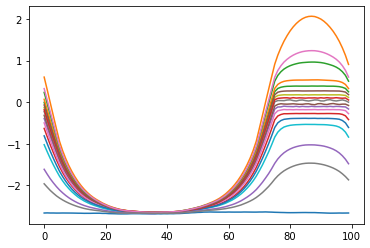

In [14]:
profile_tFV  = f"output_data/measurements_{total_site[0]}x{total_site[3]}_lmbd_{lmbd}_v0_{v0}_alpha_{alpha}_m_{m_particle}_dt_{dt}_bar_{barrier_strength}_M_1.0_L_0.0_tfull_{t_full}_tFV_{t_FV}_*_{version}.bin"
tFV_ML = 65
profile_ML  = f"output_data/measurements_{total_site[0]}x{total_site[3]}_lmbd_{lmbd}_v0_{v0}_alpha_{alpha}_m_{m_particle}_dt_{dt}_bar_{barrier_strength}_M_*_L_*_tfull_{t_full}_tFV_{tFV_ML}_*_{version}.bin"

measurements.plot_mean_path(f"output_data/measurements_{total_site[0]}x{total_site[3]}_lmbd_{lmbd}_v0_{v0}_alpha_{alpha}_m_{m_particle}_dt_{dt}_bar_{barrier_strength}_M_*_L_*_tfull_{t_full}_tFV_{tFV_ML}_*_{version}.bin")
#plt.legend()
#fig = plt.gcf()
#fig.set_size_inches(20, 10)
plt.show()

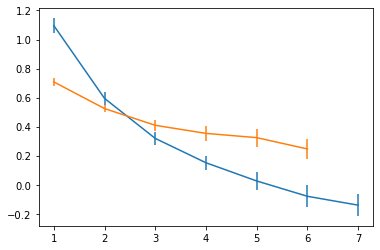

In [15]:
measurements.plot_Ebar_E_FV(profile_tFV)
measurements.plot_Ebar_slope(profile_tFV)

In [16]:
Ms = [0.0, 0.002, 0.004, 0.016, 0.032, 0.064, 0.128, 0.256, 0.512, 1.0]
Ls = [0.0, 0.002, 0.004, 0.016, 0.032, 0.064, 0.128, 0.256, 0.512, 1.0]
gamma, gamma_err = measurements.calc_gamma_w_errors(Ms, Ls, profile_ML, profile_tFV)
print(gamma, gamma_err)

Calculating dE with t_FV=60 and t_FV=70
0.001955537617232436 0.000402477714128263


In [17]:
gammas_M_L = measurements.calc_gamma_M_L_errors(Ms,Ls,profile_ML, profile_tFV)

Calculating dE with t_FV=60 and t_FV=70
Calculating dE with t_FV=60 and t_FV=70
Calculating dE with t_FV=60 and t_FV=70
Calculating dE with t_FV=60 and t_FV=70
Calculating dE with t_FV=60 and t_FV=70
Calculating dE with t_FV=60 and t_FV=70
Calculating dE with t_FV=60 and t_FV=70
Calculating dE with t_FV=60 and t_FV=70
Calculating dE with t_FV=60 and t_FV=70
Calculating dE with t_FV=60 and t_FV=70
Calculating dE with t_FV=60 and t_FV=70
Calculating dE with t_FV=60 and t_FV=70
Calculating dE with t_FV=60 and t_FV=70
Calculating dE with t_FV=60 and t_FV=70
Calculating dE with t_FV=60 and t_FV=70
Calculating dE with t_FV=60 and t_FV=70


[0.002078031002475737, 0.001855101444809098, 0.0018032575753199444, 0.001826864537039387, 0.0019158760544218418, 0.0018486028506577608, 0.002080224935992228, 0.0018520738862206558, 0.002026067991492454, 0.0019999925608505382, 0.0019857843194734256, 0.0020060081516787404, 0.0019829986824620198, 0.00202154884324161, 0.002046085620223678, 0.0019072127052084716]


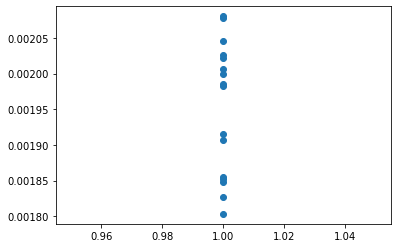

In [18]:
plt.scatter([1]*len(gammas_M_L), [gammas_M_L[i] for i in range(len(gammas_M_L))])
print(gammas_M_L)

In [21]:
l_err, u_err = measurements.calc_gamma_dis_errors(Ms,Ls,profile_ML, profile_tFV)
print(l_err, u_err)

Calculating dE with t_FV=60 and t_FV=70
Calculating dE with t_FV=60 and t_FV=65
Calculating dE with t_FV=65 and t_FV=70
7.856115035859276e-05 9.032834088495457e-05


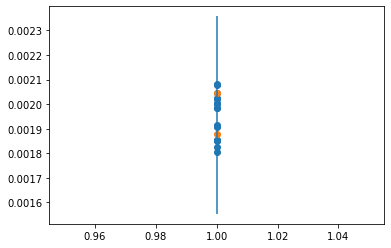

In [22]:
plt.errorbar([1.0], [gamma], [gamma_err])
plt.scatter([1.0]*len(gammas_M_L), [gammas_M_L[i] for i in range(len(gammas_M_L))])
plt.scatter([1.0]*2, [gamma+u_err, gamma-l_err])

In [ ]:
0.0018729202417479005, 0.000389280560521738
0.0020105263780584417, 0.0005082331894344297
0.002804109507570317, 0.0005700302060932646

**Systematic errors:**
- Discretization error in determining $\Delta E$ from the slope of $\bar{E}$
- Systematic bias when calculuting ratios

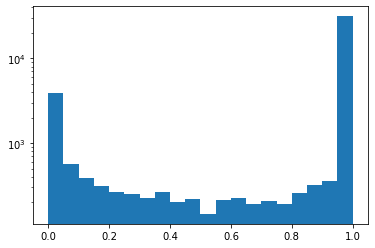

In [57]:
sf = "output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.0_tfull_5_tFV_65_*_1-1.bin"
t_TV = measurements.get_t_TV(sf)
a = np.array(np.exp(measurements.delta_actions_t_TV[sf][f"{t_TV+1}"][measurements.cutoff:]))
plt.hist(a[a>-15], bins=20)
plt.yscale("log")

2.4248795963573606

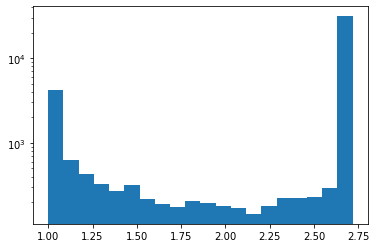

In [58]:
plt.hist(np.exp(a[a>-50]), bins=20)
plt.yscale("log")
np.mean(np.exp(a[a>-15]))

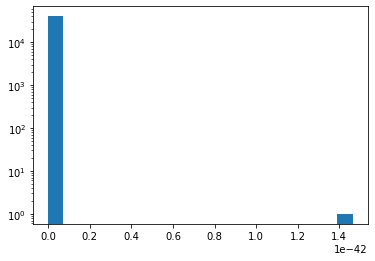

In [54]:
sf = "output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_0.0_L_1.0_tfull_5_tFV_65_*_1-1.bin"
t_TV = measurements.get_t_TV(sf)
a = np.exp(measurements.delta_actions_M[sf][f"0.512"][measurements.cutoff:])
plt.hist(a[a<1e-1], bins=20)
plt.yscale("log")
#plt.xscale("log")

**Old code:**

In [28]:
sf = "output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.0_tfull_5_tFV_60_*_1-1.bin"
Ebar = measurements.get_Ebar_E_FV(sf)
print(Ebar)

[-0.07925521899146058, 0.07470787657906983]


In [26]:
sf1 = "output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.0_tfull_5_tFV_60_*_1-1.bin"
sf2 = "output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.0_tfull_5_tFV_55_*_1-1.bin"
delta_E = measurements.get_Ebar_slope(sf1, sf2)
print(delta_E)

[0.24658002974604354, 0.06983637299327497]


In [27]:
sf1 = "output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.0_tfull_5_tFV_65_*_1-1.bin"
sf2 = "output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.0_tfull_5_tFV_55_*_1-1.bin"
delta_E = measurements.get_Ebar_slope(sf1, sf2)
print(delta_E)

[0.2883725302516306, 0.048769606934936566]


In [ ]:
Ms = [0.0, 0.002, 0.004, 0.016, 0.032, 0.064, 0.128, 0.256, 0.512, 1.0]
Ls = [0.0, 0.002, 0.004, 0.016, 0.032, 0.064, 0.128, 0.256, 0.512, 1.0]
sf0 = "output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_0.0_L_1.0_tfull_5_tFV_60_*_1-1.bin"
da_blocks = measurements.get_M_L_blocks(Ms, Ls, sf0)
ratio=measurements.calc_ratio(da_blocks, len(Ms)-1)
blocks = jk.super_jackknife_combine_blocks(da_blocks, lambda x: measurements.calc_ratio(x, len(Ms)-1))
jk.get_errors_from_blocks(ratio, blocks)

In [29]:
measurements.calc_gamma(ratio, Ebar[0], delta_E[0], 5, 0.2)

0.002466642722929898

# Calculating $\bar{E}$ and $\Delta E$

Loaded output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.0_tfull_5_tFV_75_*_1-1.bin
Loaded output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.0_tfull_5_tFV_65_*_1-1.bin
Loaded output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.0_tfull_5_tFV_60_*_1-1.bin
Loaded output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.0_tfull_5_tFV_70_*_1-1.bin
Loaded output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.0_tfull_5_tFV_85_*_1-1.bin
Loaded output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.0_tfull_5_tFV_55_*_1-1.bin
Loaded output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.0_tfull_5_tFV_80_*_1-1.bin


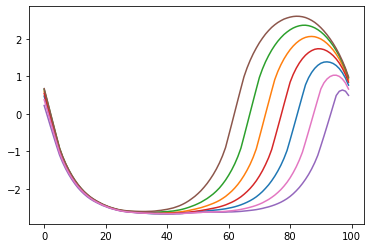

In [12]:
Nt = 100
total_site = [1,1,1,Nt]
lmbd = 0.01
v0 = 3.0
alpha = 0.0
barrier_strength = 100.0
M = "1.0"
L = "0.0"
t_full = "5"
t_FV = "*"
m_particle = 1.0
dt = 0.2
#
version = "1-1"
date = "*" #datetime.datetime.now().date()

fileid = f"{total_site[0]}x{total_site[3]}_lmbd_{lmbd}_v0_{v0}_alpha_{alpha}_m_{m_particle}_dt_{dt}_bar_{barrier_strength}_M_{M}_L_{L}_tfull_{t_full}_tFV_{t_FV}_{date}_{version}"

cutoff = 10000
block_size = 2000

measurements = Data(Nt, cutoff, block_size)
measurements.load(f"output_data/measurements_{fileid}.bin")

measurements.plot_mean_path()
plt.show()

## TDSE Calculations for $\bar{E}$ and $\Delta E$

[0.38320387088209507, 0.19998760952050332, 0.07152787017714676, -0.018307282199245094, -0.08058611319964533]
[0.42803769 0.35841281 0.29972513 0.24955727]


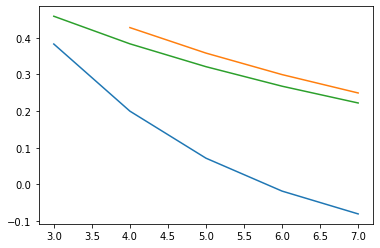

In [36]:
t_full_tdse = 1.0
t_total_tdse = 20.0
t_FV_tdse = [[7.5, 7.6, 6.4], 
             [7.0, 7.1, 6.9], 
             [6.5, 6.6, 6.4], 
             [6.0, 6.1, 5.9], 
             [5.5, 5.6, 5.4]]
t_FV_tdse = np.multiply(t_FV_tdse,2)
t_TV_tdse = [[1.5, 1.4, 1.6], 
             [2.0, 1.9, 2.1], 
             [2.5, 2.4, 2.6], 
             [3.0, 2.9, 3.1], 
             [3.5, 3.4, 3.6]]
t_TV_tdse = np.multiply(t_TV_tdse,2)
corr_tdse = [[8.248663373196439e-08, 8.905703783595409e-08, 7.704757642858247e-08],
             [6.309382431172544e-08, 6.566856939543131e-08, 6.097811910246092e-08],
             [5.599952880841047e-08, 5.680639177237058e-08, 5.543258059759522e-08],
             [5.51639432842981e-08, 5.4962332229197884e-08, 5.5525637075399806e-08],
             [5.8430364009058354e-08, 5.7496177293354066e-08, 5.9497150195223996e-08]]
corr0 = 0.0002828628961749551 # Correlation function when only H_FV is used

def plot_E_tdse(j=1):
    E_t_TV_tdse = []
    E_tdse = []
    for i in range(len(corr_tdse)):
        E_t_TV_tdse.append(t_TV_tdse[i][0])
        E_tdse.append(np.log(corr_tdse[i][j]/corr_tdse[i][0])/(t_TV_tdse[i][0]-t_TV_tdse[i][j]))
    plt.plot(E_t_TV_tdse, E_tdse)
    print(E_tdse)

def plot_slope_tdse(j=1):
    E_t_TV_tdse = []
    E_tdse = []
    for i in range(len(corr_tdse)):
        E_t_TV_tdse.append(t_TV_tdse[i][0])
        E_tdse.append(np.log(corr_tdse[i][j]/corr_tdse[i][0])/(t_TV_tdse[i][0]-t_TV_tdse[i][j]))
    plt.plot(E_t_TV_tdse[1:], (-np.subtract(E_tdse[1:], E_tdse[:-1])/np.subtract(E_t_TV_tdse[1:],E_t_TV_tdse[:-1]))**0.5)
    print((-np.subtract(E_tdse[1:], E_tdse[:-1])/np.subtract(E_t_TV_tdse[1:],E_t_TV_tdse[:-1]))**0.5)

def plot_delta_E_tdse(j=1):
    E_t_TV_tdse = []
    E_tdse = []
    for i in range(len(corr_tdse)):
        E_t_TV_tdse.append(t_TV_tdse[i][0])
        E_tdse.append(np.log(corr_tdse[i][1]*corr_tdse[i][2]/corr_tdse[i][0]**2)**0.5/(t_TV_tdse[i][0]-t_TV_tdse[i][1]))
    plt.plot(E_t_TV_tdse, E_tdse)

plot_E_tdse()
plot_slope_tdse()
plot_delta_E_tdse()

In [14]:
R = 5.599952880841047e-08/corr0
print(f"R: {R}")
dE = 0.29972513
Ebar_m_E_FV = 0.07152787017714676

print(R*(2*np.pi)**0.5/dE * np.exp(-(Ebar_m_E_FV)**2/2/dE**2)/(5*0.2)**2)

R: 0.00019797410535517493
0.0016091937249886627


## Calculating $\bar{E}$

[0.38320387088209507, 0.19998760952050332, 0.07152787017714676, -0.018307282199245094, -0.08058611319964533]
[0.34106579050817015, 0.17053898362684042, 0.05087879121495884, -0.032676524498533574, -0.09046364573722997]


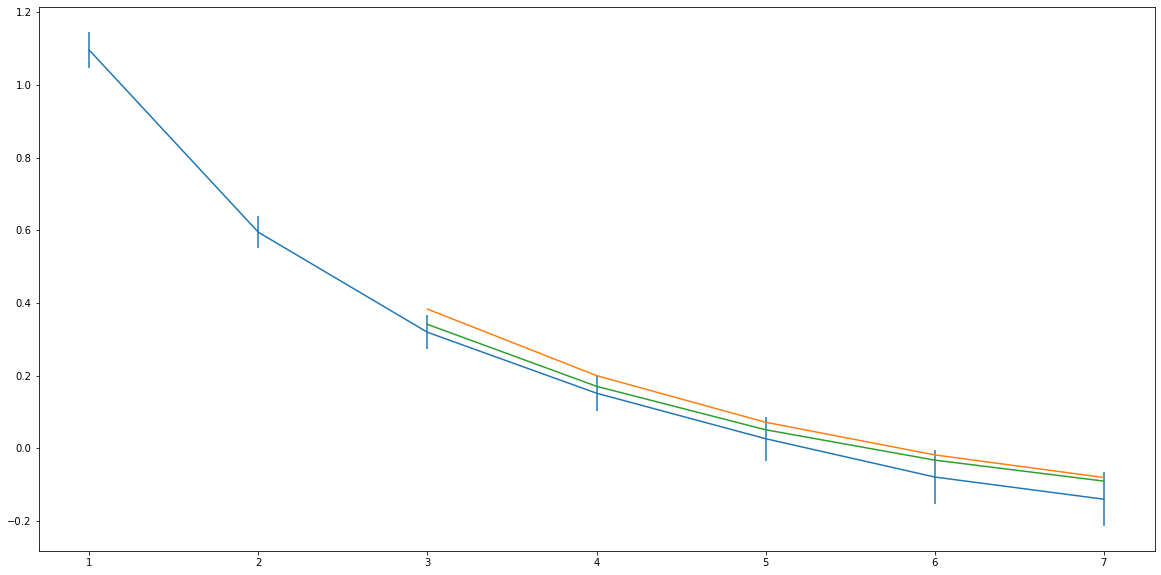

In [19]:
measurements.cutoff = 10000
measurements.block_size = 2000
measurements.plot_Ebar_E_FV(1)
#measurements.plot_Ebar_E_FV(2)
#measurements.plot_Ebar_E_FV(-2)
#measurements2.plot_Ebar_E_FV(-2)
plot_E_tdse()
plot_E_tdse(2)
#plt.xlim(8,42)
#plt.ylim(-0.7,0.7)

fig = plt.gcf()
fig.set_size_inches(20, 10)

## Calculating $\Delta E$

[0.42803769 0.35841281 0.29972513 0.24955727]


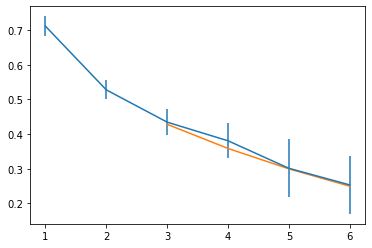

In [16]:
measurements.plot_Ebar_slope()
plot_slope_tdse()

## Analytic Calculation Based on Initial Ansatz

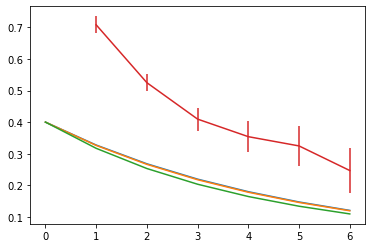

In [8]:
m_particle = 1.0
E0 = 0.4
Gamma = 0.0015
def E_dist(E,t):
    return 1/((E-E0)**2+Gamma**2/4.0)*np.exp(-E*t)

dE = 0.0001
Es=np.arange(0,2*E0,dE)
#plt.plot(Es, E_dist(Es,4.0))

def get_delta_E(t):
    return (np.sum(E_dist(Es,t)*Es**2)*dE)**0.5

def plot_delta_Es():
    dEs=[]
    for t in np.arange(0,7,1):
        dEs.append(get_delta_E(t))
    plt.plot(np.divide(dEs,2.5*dEs[0]))

plot_delta_Es()
Gamma = 0.015
plot_delta_Es()
Gamma = 0.15
plot_delta_Es()
measurements.plot_Ebar_slope()
#plot_half_slope_tdse()

## Obserable Distribution

[0.31928225666093996, 0.0466713256630312]
0.319282256660941


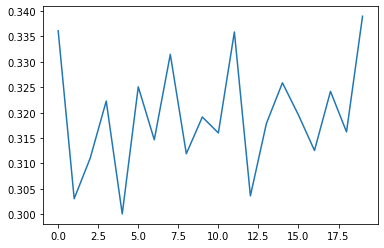

In [50]:
measurements.block_size = 2000
measurements.cutoff=10000

t_TV = measurements.get_t_TV(sf)
t_FV = int(measurements.get_param(sf,"tFV"))
dt = float(measurements.get_param(sf, "dt"))

blocks_TV = jk.get_jackknife_blocks(np.exp(measurements.delta_actions_t_TV[sf][f"{t_TV+1}"][measurements.cutoff:]), measurements.block_size)
blocks_FV = jk.get_jackknife_blocks(np.exp(measurements.delta_actions_t_FV[sf][f"{t_FV+1}"][measurements.cutoff:]), measurements.block_size)
bdiv = np.log(np.divide(blocks_FV,blocks_TV))/(dt*1)

#plt.plot(np.exp(measurements.delta_actions_t_FV[sf][f"{t_FV+1}"][measurements.cutoff:measurements.cutoff+100]))
plt.plot(bdiv[:])
print(jk.get_errors_from_blocks(np.mean(bdiv), bdiv))
print(np.mean(bdiv))

# Changing M and L

In [32]:
Nt = 100
total_site = [1,1,1,Nt]
lmbd = 0.01
v0 = 3.0
alpha = 0.0
barrier_strength = 100.0
M = "*"
L = "*"
t_full = 5
t_FV = 60
m_particle = 1.0
dt = 0.2
#
version = "1-1"
date = "*" #datetime.datetime.now().date()

fileid = f"{total_site[0]}x{total_site[3]}_lmbd_{lmbd}_v0_{v0}_alpha_{alpha}_m_{m_particle}_dt_{dt}_bar_{barrier_strength}_M_{M}_L_{L}_tfull_{t_full}_tFV_{t_FV}_{date}_{version}"

cutoff = 10000
block_size = 2000

measurements = Data(Nt, cutoff, block_size)
measurements.load(f"output_data/measurements_{fileid}.bin")

Loaded output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_0.004_L_1.0_tfull_5_tFV_60_*_1-1.bin
Loaded output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.002_tfull_5_tFV_60_*_1-1.bin
Loaded output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_0.128_L_1.0_tfull_5_tFV_60_*_1-1.bin
Loaded output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_0.512_L_1.0_tfull_5_tFV_60_*_1-1.bin
Loaded output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.0_tfull_5_tFV_60_*_1-1.bin
Loaded output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.512_tfull_5_tFV_60_*_1-1.bin
Loaded output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.004_tfull_5_tFV_60_*_1-1.bin
Loaded output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.016_tfull_5_tFV

In [27]:
#for M in np.arange(0.0, 1.0, 0.001):
#    fileid = f"{total_site[0]}x{total_site[3]}_lmbd_{lmbd}_v0_{v0}_alpha_{alpha}_m_{m_particle}_dt_{dt}_bar_{barrier_strength}_M_{round(M,5)}_L_{L}_tfull_{t_full}_tFV_{t_FV}_{date}_{version}"
#    measurements.load(f"output_data/measurements_{fileid}.bin")

In [28]:
#M = 1.0
#for L in np.arange(0.0, 1.0, 0.001):
#    fileid = f"{total_site[0]}x{total_site[3]}_lmbd_{lmbd}_v0_{v0}_alpha_{alpha}_m_{m_particle}_dt_{dt}_bar_{barrier_strength}_M_{M}_L_{round(L,5)}_tfull_{t_full}_tFV_{t_FV}_{date}_{version}"
#    measurements.load(f"output_data/measurements_{fileid}.bin")

output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_0.0_L_1.0_tfull_5_tFV_60_*_1-1.bin
No previous factor found for M=0.0
[0.002, 0.004, 0.008, 0.016, 0.032, 0.064, 0.128, 0.256, 0.512]
[0.0030381827888954728, 0.0002447466372446974, 1.3851577695658099e-05, 3.7587872359979025e-07, 2.1360199753202238e-09, 1.5929545746438433e-13, 1.0084210224527914e-21, 4.067568038674941e-38, 6.6180438982960266e-71]
[0.00040224605669898577, 6.191052619662937e-05, 5.847521856991044e-06, 3.023752827495025e-07, 2.117411724550925e-09, 1.5929177438700839e-13, 1.0084210222072163e-21, 4.06756803867491e-38, 6.618043898296042e-71]
output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_0.002_L_1.0_tfull_5_tFV_60_*_1-1.bin
[0.004, 0.008, 0.016, 0.032, 0.064, 0.128, 0.256, 0.512, 1.0]
[0.00021249028138238803, 1.0822254353361228e-05, 4.196933766592121e-07, 1.587284449568787e-08, 2.7849961017278944e-10, 2.3812863964029433e-13, 2.6934072011635205e-19, 4.38246882

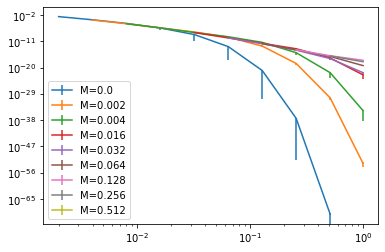

In [33]:
measurements.plot_expS_vs_M()
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()

output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.0_tfull_5_tFV_60_*_1-1.bin
No previous factor found for L=0.0
[0.002, 0.004, 0.008, 0.016, 0.032, 0.064, 0.128, 0.256, 0.512]
[0.03988948194844301, 0.007612510233526748, 0.0009244276310329283, 6.701404207957364e-05, 3.2038109741024985e-06, 8.651114904295463e-08, 2.4852305689879025e-10, 2.4644051600053136e-15, 2.429315701273673e-25]
[0.0022310174550194835, 0.0006890582996812603, 0.00013307647070615823, 1.7161835967718437e-05, 1.7350525268246008e-06, 7.914638381570889e-08, 2.482085957040292e-10, 2.4644044085456323e-15, 2.429315701273628e-25]
output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_1.0_L_0.002_tfull_5_tFV_60_*_1-1.bin
[0.004, 0.008, 0.016, 0.032, 0.064, 0.128, 0.256, 0.512, 1.0]
[0.00818284607422142, 0.001100674632893467, 8.906516339477246e-05, 4.048406938979535e-06, 1.429412085717646e-07, 3.5302374253354176e-09, 5.860228112252495e-12, 2.072639000795056e-17

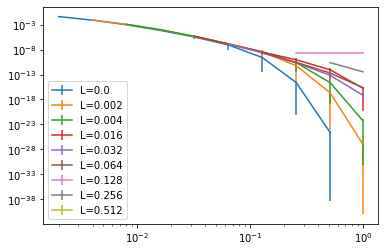

In [34]:
measurements.plot_expS_vs_L()
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()

In [31]:
Ms = [0.0, 0.002, 0.004, 0.016, 0.032, 0.064, 0.128, 0.256, 0.512, 1.0]
Ls = [0.0, 0.002, 0.004, 0.016, 0.032, 0.064, 0.128, 0.256, 0.512, 1.0]
sf0 = "output_data/measurements_1x100_lmbd_0.01_v0_3.0_alpha_0.0_m_1.0_dt_0.2_bar_100.0_M_0.0_L_1.0_tfull_5_tFV_65_*_1-1.bin"
da_list = measurements.get_M_L_list(Ms, Ls, sf0)
ratio=measurements.calc_ratio(da_list, len(Ms)-1)
print(ratio)

AttributeError: 'Data' object has no attribute 'get_M_L_list'

In [17]:
blocks = jk.get_super_jackknife_blocks(da_list, 1000, lambda x: measurements.calc_ratio(x, len(Ms)-1))
jk.get_errors_from_blocks(ratio, blocks)

[0.0002653559844209393, 3.800391252415348e-05]

In [ ]:
[0.0002653559844209393, 3.800391252415348e-05]